
# How to Tell a Story Using Data Project

## Project description
You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Data description:
### rest_data table
* object_name — establishment name
* chain — chain establishment (TRUE/FALSE)
* object_type — establishment type
* address — address
* number — number of seats

### Data Analysis
1. Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

<div class="alert alert-warning" role="alert">
How to add a table of contents with links.
    
Please see for details: https://www.markdowntutorial.com/
</div>

### Step 1. Download the data and prepare it for analysis <a id="Step 1"></a>
Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary. File path: /datasets/rest_data_us.csv. Download dataset


In [1]:
#data preprocessing and upload
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set()

#a function that provides information about each file
def get_information(df):
    print('Head:')
    print()
    display(df.head())
    print('-' * 20)
    print('Info:')
    print()
    display(df.info())
    print('-' * 20)
    print('Describe:')
    print()
    display(df.describe())
    print('-' * 20)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    print('-'*20)
    print('Shape:')
    print(df.shape)
    print('-'*20)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + "\033[0m")    

#getting percentages of missing values by column
def get_percent_of_na_df(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

#getting percentages of missing values
def get_percent_of_na(df):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data_us.csv')
                   
get_information(data)

Head:



,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


--------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

--------------------
Describe:



,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


--------------------


,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.00
object_name,0,0.00
address,0,0.00
chain,3,0.03
object_type,0,0.00
number,0,0.00


--------------------
Shape:
(9651, 6)
--------------------
Duplicated:
We have 0 duplicated rows. 



In [3]:
data['chain'].mode()

0    False
dtype: object

In [4]:
#replacing NAN in chain with False
#data['chain'].fillna(value=data['chain'].mode(), inplace=True)
display(data)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [5]:
print(data['chain'].isnull().sum())

3


In [6]:
data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [7]:
data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [8]:
data['chain'] = data['chain'].fillna(False)

In [9]:
data['chain'].count()

9651

In [10]:
# shows we fixed the nulls in the chain column

In [11]:
data['number'].value_counts().head()

12    204
19    203
25    203
5     198
18    197
Name: number, dtype: int64

In [12]:
data['number'].mean()

43.69516112319967

<div class="alert alert-success" role="alert">
use .format to output only required number of decimal places (https://pyformat.info/).
</div>

In [13]:
data['address'].value_counts()

3607 TROUSDALE PKWY             11
135 N GRAND AVE                 10
600 WORLD WAY                    9
5151 STATE UNIVERSITY DR         9
400 WORLD WAY                    9
                                ..
3113 N SAN FERNANDO RD           1
701 S BROADWAY UNIT UNIT         1
5301 W SUNSET BLVD # 11          1
12340 SANTA MONICA BLVD # #A     1
2938 E WHITTIER BLVD             1
Name: address, Length: 8517, dtype: int64

In [14]:
data['address'].head()

0       3708 N EAGLE ROCK BLVD
1          100 WORLD WAY # 120
2    6801 HOLLYWOOD BLVD # 253
3           1814 W SUNSET BLVD
4           2100 ECHO PARK AVE
Name: address, dtype: object

In [15]:
data['object_name'] = data['object_name'].str.lower()
print(data['object_name'].value_counts().head(30))


the coffee bean & tea leaf    47
subway                        31
domino's pizza                15
kentucky fried chicken        14
waba grill                    14
mcdonald's                    13
trimana                       13
yogurtland                    12
hong kong express             12
starbucks                     12
papa john's pizza             12
subway sandwiches             11
chipotle mexican grill        10
louisiana fried chicken       10
wingstop                      10
el pollo loco                 10
blue bottle coffee             9
kfc                            9
carl's jr                      8
jersey mike's subs             8
baskin robbins                 8
pinkberry                      7
china express                  7
la monarca bakery              6
taco bell                      6
whole foods market             6
panda express                  6
chinatown express              6
little caesars                 6
wetzel's pretzels              6
Name: obje

In [16]:
data['address'] = data['address'].str.lower()
print(data['address'].value_counts().head(30))

3607 trousdale pkwy         11
135 n grand ave             10
5151 state university dr     9
600 world way                9
400 world way                9
700 world way                8
300 world way                8
2025 avenue of the stars     8
545 s figueroa st            8
100 world way                6
450 s western ave            6
900 w olympic blvd           5
6201 whittier blvd           5
500 world way                5
10250 santa monica blvd      5
800 n alameda st             5
6360 w sunset blvd           5
7000 hollywood blvd          5
380 world way                5
6250 hollywood blvd          5
2740 w olympic blvd          5
1000 wilshire blvd           4
701 stone canyon rd          4
12746 w jefferson blvd       4
538 s flower st              4
9750 airport blvd            4
3500 wilshire blvd           4
330 s hope st                4
6021 hollywood blvd          4
2700 colorado blvd           4
Name: address, dtype: int64


#### Conclusion
No duplicates found. column 'chain' has 3 nulls so we need to replace that with an appropriate value. I am going with mode which equals 0 which is False because mode is going to demonstrate the value we see most often in this column therefore, this is why I chose mode. I also converted object name and address as lowercase so that we can appropriately read the data. 

###  Step 2. Data analysis

#### 1. Investigate the proportions of the various types of establishments. Plot a graph.


In [17]:
EstablishmentTypeTotals = data.groupby('object_type').agg({'object_type':'count'})
EstablishmentTypeTotals

,object_type
object_type,
Bakery,283
Bar,292
Cafe,435
Fast Food,1066
Pizza,320
Restaurant,7255


In [18]:
EstablishmentTypeTotals1 = data.groupby('object_type').agg(sum)
EstablishmentTypeTotals1

# shows most counts of IDs in Restaurants,Fastfood and Cafes and this is because of the amounts of them, and their nature.

,id,chain,number
object_type,,,
Bakery,4675156,283.0,6162
Bar,4889115,77.0,13072
Cafe,7630442,266.0,10875
Fast Food,17649376,605.0,33939
Pizza,5362860,153.0,9107
Restaurant,120105812,2292.0,348547


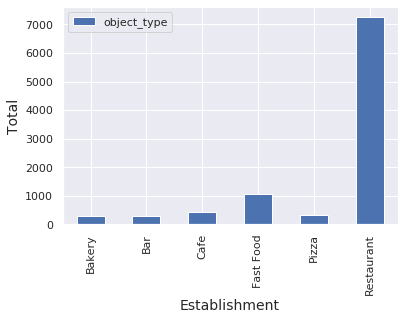

In [19]:
EstablishmentTypeTotals.plot(kind='bar')
plt.ylabel('Total', fontsize=14)
plt.xlabel('Establishment', fontsize=14)
plt.show()

#changed to bar plot

<div class="alert alert-info" - <\div> Shows there are more restaurants, fast food establishments and cafes as top 3 establishments with restaurants clearly being in the lead. Used different graph

#### Conclusion
We see the top three establishments are restaraunt, fast food and cafe by total counts of establishments. Los Angeles has a big food scene as the climate is amazing and lots of people live there. They have access to good produce so thats why restaurants are so popular. With lots of people visiting this city, tourism is big and why wouldn't they want to have good food or eat in general? I know whenever I visit Cali I eat all kinds of good food and plan on eating 

#### 2. Investigate the proportions of chain and nonchain establishments. Plot a graph.


,chain,number
0,False,46.156653
1,True,39.694233


,chain,number
0,False,5975
1,True,3676


Text(0.5, 0, 'Chain')

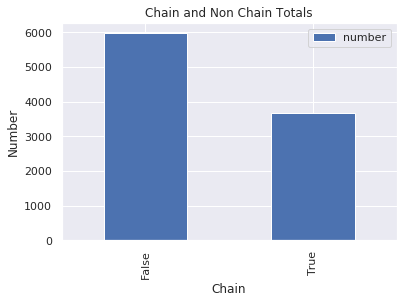

In [20]:
#Investigate the proportions of chain and nonchain establishments. Plot a graph.
ChainAvg = data.groupby('chain', as_index=False).agg({'number' : 'mean'})
display(ChainAvg)

ChainSum = data.groupby('chain', as_index=False).agg({'number' : 'count'})
display(ChainSum)


barplot = ChainSum.plot(x='chain', kind='bar')
plt.title('Chain and Non Chain Totals')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Chain', fontsize=12)

#### Conclusion
Most establishments are not chains. I think the reason is because there are lots of small businesses in california and L.A. and its more expensive to own a chain so I belive this is probably why their are more private locally owned establishments instead of big chains. Rent also probably costs a lot as california is very expensive so only a small amount of business owners can probably afford upfront costs for a chain.

#### 3. Which type of establishment is typically a chain?

venue_data = data.groupby(['object_type', 'chain']).count()['number']
print(venue_data)
- shows count of chains/non-chains per establishment


In [21]:
venue_data1= data.pivot_table(index=['object_type','chain'], values=['number'], aggfunc=['count'])
venue_data1


count
                  number
object_type chain       
Bakery      True     283
Bar         False    215
            True      77
Cafe        False    169
            True     266
Fast Food   False    461
            True     605
Pizza       False    167
            True     153
Restaurant  False   4963
            True    2292

In [22]:
venue_data2= data.pivot_table(index=['object_type','chain'], values=['number'], aggfunc=['mean'])
venue_data2

mean
                      number
object_type chain           
Bakery      True   21.773852
Bar         False  46.381395
            True   40.259740
Cafe        False  23.556213
            True   25.917293
Fast Food   False  23.633406
            True   38.089256
Pizza       False  31.143713
            True   25.529412
Restaurant  False  49.513802
            True   44.856021

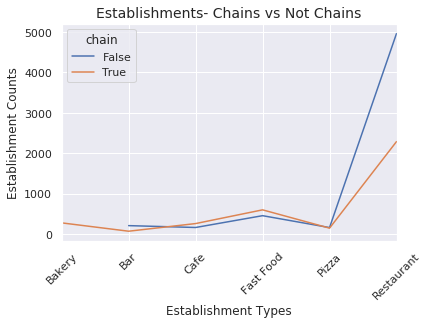

In [23]:
df = data.groupby(['object_type', 'chain']).count()['number']
# plot the result
df.unstack().plot()
plt.xticks(rotation=45)
plt.title('Establishments- Chains vs Not Chains', fontsize=14)
plt.ylabel('Establishment Counts', fontsize=12)
plt.xlabel('Establishment Types', fontsize=12)

plt.show()

<div class="alert alert-success" role="alert">
can avoid "<matplotlib.axes._subplots.AxesSubplot at 0x7f44cf8dcc90>" by using ";" after code lines with graph.
</div>

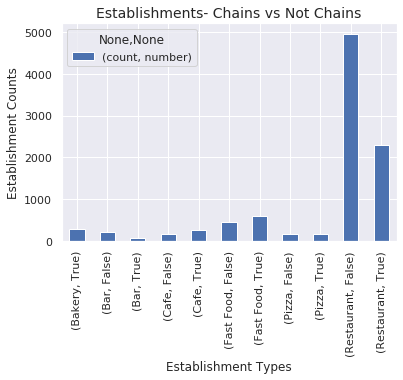

In [24]:
venue_data1.plot(kind='bar')
plt.title('Establishments- Chains vs Not Chains', fontsize=14)
plt.ylabel('Establishment Counts', fontsize=12)
plt.xlabel('Establishment Types', fontsize=12)
plt.show()

#### Conclusion
Shows that Bakery is always a chain. Cafe and fast food establishments have higher counts of chains than not chains.

#### 4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [25]:
EstablishmentSeatCount= data.pivot_table(index=['object_type','chain'], values=['number'], aggfunc=['count','sum','mean'])
EstablishmentSeatCount

# we know there are more non-chain establishments

count     sum       mean
                  number  number     number
object_type chain                          
Bakery      True     283    6162  21.773852
Bar         False    215    9972  46.381395
            True      77    3100  40.259740
Cafe        False    169    3981  23.556213
            True     266    6894  25.917293
Fast Food   False    461   10895  23.633406
            True     605   23044  38.089256
Pizza       False    167    5201  31.143713
            True     153    3906  25.529412
Restaurant  False   4963  245737  49.513802
            True    2292  102810  44.856021

In [26]:
#3676 total # of chain establishments
#few establishments with lots of seats as chains are less than non chains but they do contain lots of seats

notchains = data[data['chain'] == False]
notchains
notchains.pivot_table(index='object_type', values='number', aggfunc='count').sort_values(by='number', ascending=False)

3676 = total number of chain establishments

#### Conclusion
We have less chains in total. Few establishments with a lot of seats

#### 5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.



Restaurant_Seat_Avg = data.query('object_type == "Restaurant"')
Restaurant_Seat_Avg


#shows which restaurants have the greatest number of seats, most are not chain

In [27]:
Restaurant_Seat_Avg1 = data.groupby('chain').agg({'object_type': 'count'}).reset_index()
display(Restaurant_Seat_Avg1.sort_values(by='chain', ascending=False).head(15))


,chain,object_type
1,True,3676
0,False,5975


In [28]:
Restaurant_Seat_Avg = data.pivot_table(index=['object_type'], values='number',aggfunc='mean').sort_values(by=['number'], ascending=False).reset_index()
RestaurantAvgSeatNumber = Restaurant_Seat_Avg
RestaurantAvgSeatNumber


#more non-chain restaurants have a higher average seat count

,object_type,number
0,Restaurant,48.042316
1,Bar,44.767123
2,Fast Food,31.837711
3,Pizza,28.459375
4,Cafe,25.000000
5,Bakery,21.773852


TopRestaurantAvgSeatNumber=RestaurantAvgSeatNumber.head(200)
TopRestaurantAvgSeatNumber.sort_values(by='number', ascending=False)

In [29]:
Restaurant_Seat_Avg.describe()

,number
count,6.000000
mean,33.313396
std,10.734447
min,21.773852
25%,25.864844
50%,30.148543
75%,41.534770
max,48.042316


barplot = RestaurantAvgSeatNumber.plot(x='object_type', y='number', kind='scatter') #kind='bar')
plt.title('Restaurant Seat Avg Totals')
plt.ylabel('Avg # of Seats', fontsize=12)
plt.xlabel('Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Restaurant_Seat_Avg2 = data.pivot_table(index=['object_name','chain'], values='number',aggfunc='sum').sort_values(by='number', ascending=False)
Restaurant_Seat_Avg2.head()

#shows which restaurant types have the greatest number of seats in total

<div class="alert alert-info" role="display"> Restaurant,Bar and Fastfood have the highest avg number of seats


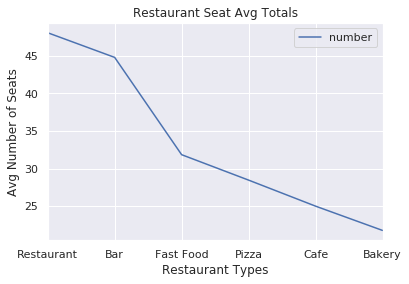

In [30]:
RestaurantAvgSeatNumber.plot(x='object_type') #kind='bar')
plt.title('Restaurant Seat Avg Totals')
plt.ylabel('Avg Number of Seats', fontsize=12)
plt.xlabel('Restaurant Types', fontsize=12)
#plt.xticks(rotation=90)
plt.show()

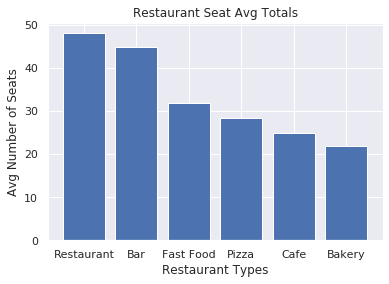

In [31]:
plt.bar(Restaurant_Seat_Avg['object_type'],Restaurant_Seat_Avg['number'])
plt.title('Restaurant Seat Avg Totals')
plt.ylabel('Avg Number of Seats', fontsize=12)
plt.xlabel('Restaurant Types', fontsize=12)
plt.show()

# shows that Restaurants have the highest average of seats and then Bar

#### 6. Put the data on street names from the address column in a separate column.

In [32]:
#import re
def street_name(address):
    clean_address = []
    for word in address.split()[1:]:
        if word == "#" or word[0] == "#":
            break
        clean_address.append(word)
        if word in ("BLVD", "ST", "AVE", "DR", "RD", "STE") :
        #if word in ("APT", "UNIT", "STE") :
            break
    return " ".join(clean_address)

#data['clean_address'] = data['address'].apply(lambda x : " ".join(re.findall(r'\b[^\d\W]+\b', x)))
#data['clean_address'] = data['address'].apply(super_func).apply(lambda x : " ".join(re.findall(r'\b[^\d\W]+\b', x)))
data['clean_address'] = data['address'].apply(street_name) #creating new column and applying the loop to it
data['clean_address'] = data['clean_address'].str.upper() 


In [33]:
data.head()

,id,object_name,address,chain,object_type,number,clean_address
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,reilly's,100 world way # 120,False,Restaurant,9,WORLD WAY
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,W SUNSET BLVD
4,11790,pollen,2100 echo park ave,False,Restaurant,20,ECHO PARK AVE


data['street_name']=data['address'].apply(lambda x: x.split(' ',1)[1])
data['street_name']=data['street_name'].str.replace('#[ \w\-%]+','')
data['street_name']=data['street_name'].str.replace('STE[ \w\-%]+','')
data['street_name']=data['street_name'].str.replace('SUITE[ \w\-%]+','')
data['street_name']=data['street_name'].str.replace('UNIT[ \w\-%]+','')
data['street_name']=data['street_name'].str.replace('APT[ \w\-%]+','')
data['street_name']=data['street_name'].str.strip()
data

#### 7.Plot a graph of the TOP 10 streets by number of restaurants.

streetsbyrestaurantNumber = data.query('object_type == "Restaurant"')
streetsbyrestaurantNumber
#I believe we are only looking at Restaurants specifically

In [34]:
Top10streetsbyRestaurantNumber = data.pivot_table(index='clean_address', values='object_type', aggfunc='count').sort_values(by='object_type',ascending=False).reset_index()
Top10streetsbyRestaurantNumber

,clean_address,object_type
0,W SUNSET BLVD,320
1,W PICO BLVD,312
2,WILSHIRE BLVD,242
3,SANTA MONICA BLVD,211
4,HOLLYWOOD BLVD,204
...,...,...
1865,OLYMPIC BLVD 102-A,1
1866,NORWALK BLVD,1
1867,NEWELL AVE,1
1868,NEBRASKA AVE,1


rest_stat = data.groupby('street_name').agg({'object_type':'count'}).sort_values(by='object_type', ascending=False)
top10_rest = rest_stat[:10]
top10_rest

Top10streetsbyRestaurantNumber.describe()

In [35]:
display(np.percentile(Top10streetsbyRestaurantNumber['object_type'], [90, 95, 99]))

array([ 7., 18., 90.])

In [36]:
TOP10STREETS = Top10streetsbyRestaurantNumber.head(10)
TOP10STREETS
#by number of restaurants 

,clean_address,object_type
0,W SUNSET BLVD,320
1,W PICO BLVD,312
2,WILSHIRE BLVD,242
3,SANTA MONICA BLVD,211
4,HOLLYWOOD BLVD,204
5,S WESTERN AVE,202
6,W 3RD ST,177
7,S FIGUEROA ST,177
8,S VERMONT AVE,174
9,W OLYMPIC BLVD,160


TOP10STREETS.plot(x='clean_address', kind='bar')
plt.title('Top 10 Streets by Restaurant Counts')
plt.ylabel('Restaurant Total', fontsize=12)
plt.xticks(rotation=45)
#plt.legend()
plt.xlabel('Address', fontsize=12)
plt.show()

#### ^^ AWESOME GRAPH JUST NOT AS COOL AS ONE BELOW

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

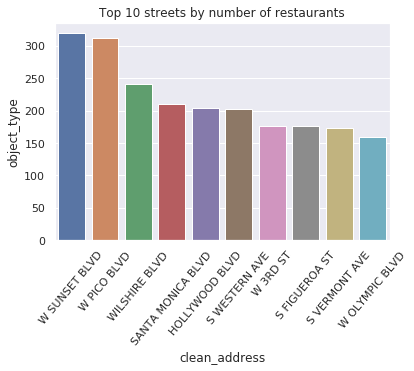

In [37]:
ax = sns.barplot(data=TOP10STREETS,x='clean_address',y='object_type').set_title('Top 10 streets by number of restaurants')
plt.xticks(rotation=50)

<div class="alert alert-info">
- Some streets have large number of seats because some streets have more restaurants and restaurants have larger number of seats
</div>


#### 8. Find the number of streets that only have one restaurant.

In [38]:
#RestaurantOnly =  data.query('object_type == "Restaurant"')

#RestaurantOnly
#SoloStreetRestaurant = data.query('number <2')

In [39]:
SoloStreetRestaurant= data.pivot_table(index='clean_address',values='object_type',aggfunc='count').sort_values(by='object_type', ascending=True).reset_index()
SoloStreetRestaurant

,clean_address,object_type
0,1/2 3RD ST,1
1,S VERMONT AVE STE 104,1
2,S VERMONT AVE STE 101,1
3,S VERMONT AVE STE 1,1
4,S VERMONT AVE G&W,1
...,...,...
1865,HOLLYWOOD BLVD,204
1866,SANTA MONICA BLVD,211
1867,WILSHIRE BLVD,242
1868,W PICO BLVD,312


In [40]:
SoloStreetRestaurantCount= SoloStreetRestaurant[SoloStreetRestaurant['object_type']<2]
SoloStreetRestaurantCount.sort_values(by='clean_address', ascending=True)


,clean_address,object_type
0,1/2 3RD ST,1
1242,1/2 7TH ST,1
1253,1/2 CITY TERRACE DR,1
1239,1/2 COLORADO BLVD,1
1266,1/2 E 2ND ST,1
...,...,...
523,WORLD WAY T74,1
522,WORLD WAY TSB,1
521,YALE ST,1
520,Z00 DR,1


<div class="alert alert-info">quite difficult to understand why since we dont have a lot of info to go(yandex tutor agreed) on but i assume they are small streets where there isnt many restaurants or space for such things 

<div class="alert alert-success" role="alert">
See details about the smallest streets in the world: https://www.smithsonianmag.com/travel/top-ten-small-streets-worth-visiting-180954589/
</div>

RestaurantPerStreetTotal = data.pivot_table(index='clean_address',values='object_type',aggfunc='count').sort_values(by='object_type', ascending=True)
RestaurantPerStreetTotal

#### 9.For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [41]:
StreetsWithManyRestaurants = data.pivot_table(index='clean_address', values='object_type', aggfunc='count').sort_values(by='object_type',ascending=False).reset_index()
StreetsWithManyRestaurants

,clean_address,object_type
0,W SUNSET BLVD,320
1,W PICO BLVD,312
2,WILSHIRE BLVD,242
3,SANTA MONICA BLVD,211
4,HOLLYWOOD BLVD,204
...,...,...
1865,OLYMPIC BLVD 102-A,1
1866,NORWALK BLVD,1
1867,NEWELL AVE,1
1868,NEBRASKA AVE,1


In [42]:
display(np.percentile(StreetsWithManyRestaurants['object_type'], [90, 95, 99]))

array([ 7., 18., 90.])

In [43]:
DistOfSeatCounts = StreetsWithManyRestaurants.head(97)
DistOfSeatCounts
#DistOfSeatCounts['total_seats']= StreetsWithManyRestaurants1['clean_address'].value_counts()
# shows the streets with whats considered the most amount of restaurants

,clean_address,object_type
0,W SUNSET BLVD,320
1,W PICO BLVD,312
2,WILSHIRE BLVD,242
3,SANTA MONICA BLVD,211
4,HOLLYWOOD BLVD,204
...,...,...
92,HYPERION AVE,19
93,W 3RD ST STE,18
94,W 9TH ST,18
95,E VERNON AVE,18


DistOfSeatCounts.describe()

In [44]:
dist_top_streets= data[data['clean_address'].isin(Top10streetsbyRestaurantNumber['clean_address'])].reset_index()
dist_top_streets= dist_top_streets.groupby(['clean_address']).agg({'object_type':'count','number':'sum'}).sort_values(by='number',ascending=False).reset_index()
dist_top_streets


,clean_address,object_type,number
0,W SUNSET BLVD,320,15994
1,WILSHIRE BLVD,242,13285
2,W PICO BLVD,312,12482
3,HOLLYWOOD BLVD,204,11673
4,W OLYMPIC BLVD,160,8611
...,...,...,...
1865,ST E8,1,1
1866,WILSHIRE BLVD STE 26,1,1
1867,W 5TH ST STE 70F,1,1
1868,N LARCHMONT AVE,1,1


In [45]:
dist_top_streets.describe()

# shows average of 5 restaurants and 225 seats 

,object_type,number
count,1870.000000,1870.000000
mean,5.160963,225.509091
std,19.758203,912.770934
min,1.000000,1.000000
25%,1.000000,19.000000
50%,1.000000,38.000000
75%,2.000000,124.750000
max,320.000000,15994.000000


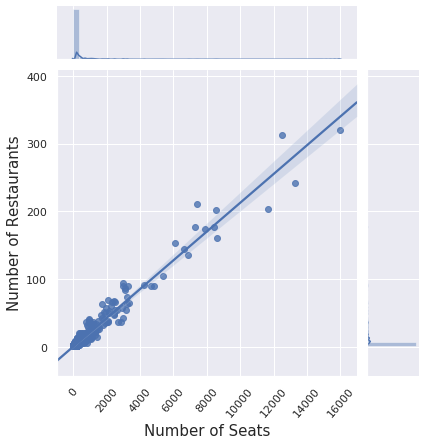

In [46]:
g=sns.jointplot(x='number',y='object_type',data=dist_top_streets, kind='reg')
g.set_axis_labels("Number of Seats", "Number of Restaurants", fontsize=15)
plt.xticks(rotation=50)
plt.show()
# shows that the number of restaurants vs number of seats

**The streets that have more restaurants usually have more number of seats but not always as you can see between pico and wilshire blvd. It shows that a lot more streets have a number of seats that are below 2000 in total as you can see where its heavier on the graph.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


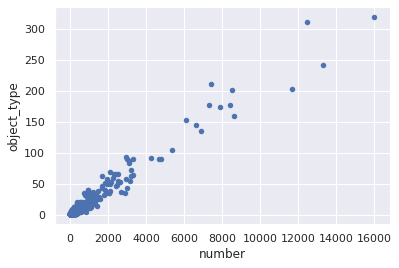

In [47]:
dist_top_streets.plot(x='number',y='object_type',kind='scatter')

### Overall Conclusion
Provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

- Shows there are more restaurants, fast food establishments and cafes as top 3 establishments with restaurants clearly being in the lead. 
- Most establishments are not chains.
- Shows that Bakery is always a chain. Cafe and fast food establishments have higher counts of being chains that not.
- Since we don’t have many establishments that are chains we have fewer establishments but they do have a lot of seats.
- Restaurant, Bar and fast food has the highest average number of seats.
- Sunest Blvd, Wilshire, and W Pico Blvd have the most Restaurants per street.
- 1288 counts of Streets with only 1 Restaurant.

Summary:
Its important to see what streets are packed with restaurants and which are not. We know the 10 most popular streets based off the number of restaurants and we know what streets have little to no restaurants. You would be safe running a cafe, fast food joint or restaurant as they are the most popular. For number of seats we can see that cafes have the second to last avg number of seats when compared to the rest of the establishments. Running a chain is a possibility but it depends on the success of the cafe and the costs involved. 

#### Step 3. Preparing a presentation
Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment. Include a link to the presentation in a markdown cell in the following format:
 

Presentation: <link to cloud storage> 

<div class="alert alert-info" role="alert">
Presentation Link Below:

(https://drive.google.com/file/d/1nmsZvNxrkyRH0S_dKMRTAbZQXuy_6Vza/view?usp=sharing)